In [104]:
import os
import sklearn
from sklearn.linear_model import LinearRegression, SGDRegressor, Ridge
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
import numpy as np
import numpy.random as rnd
import matplotlib  as mpl
import matplotlib .pyplot as plt

#To make the notebook's output stable across runs
np.random.seed(42)

#Uses Jupyter's own backend to plot
%matplotlib inline

#To make pretty figures
mpl.rc("axes", labelsize=14)
mpl.rc("xtick", labelsize=12)
mpl.rc("ytick", labelsize=12)

#Path for saving images 
IMAGES_PATH = os.path.join("images")
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Section: Linear Regression

In chapter 1, the regression model of life satisfaction was - <strong>life_satisfaction</strong> = <strong>theta[0]</strong> + <strong>theta[1]</strong> * <strong>GDP_per_capita</strong>. A linear function where <strong>theta[0]</strong> and <strong>theta[1]</strong> are the models hyperparameters and <strong>GDP_per_capita</strong> is the input feature

In other words, it makes a prediction by computing a weighted sum of the input features + a constant called the bias term (theta0)

Vectorized equation of Linear Regression

<img src="images/Linear regression - vectorized equation.png">

<ul>
    <li>
<strong>theta</strong> is the models parameter vector, containing the bias term <strong>theta[0]</strong> and the feature weights <strong>theta[1]</strong> to <strong>thetan</strong>
    </li>
    <li><strong>x</strong> is the instances feature vector, containing <strong>x[0]</strong> to <strong>x[n]</strong>, with <strong>x0</strong> always equal to 1</li>
    <li><strong>theta*x</strong> is the dot product of <strong>theta</strong> and <strong>x</strong></li>
    <li><strong>h0</strong> is the hypothesis function, using the model parameters <strong>theta</strong></li>
</ul>

When we train a model, we want it to best fit the training set. We do this by measuring it's performance with the mean squared error (MSE). So, we need to find the value of <strong>theta</strong> that minimizes MSE.

Mean squared error equation

<img src="images/Mean squared error equation.png">

##### The normal equation

There is a <em>closed form solution</em> that gives us the value of <strong>theta</strong> which minimizes the cost function, Knonwn as <em>Normal Equation</em>

<img src="images/Normal equation.png">

<ul>
    <li><strong>theta_hat</strong> is the value of <strong>theta</strong> that minimizes the cost function</li>
    <li><strong>y</strong> is the vector of target values containing <strong>y[1]</strong> to <strong>y[m]</strong></li>
</ul>

Use numpy to test the equation, we'll use the function: y = 4 + 3X[1] + Gaussian noise (random noise)

In [2]:
X = 2*np.random.rand(100, 1)
y = 4+3*X+np.random.randn(100, 1)

Saving figure generated_data_plot


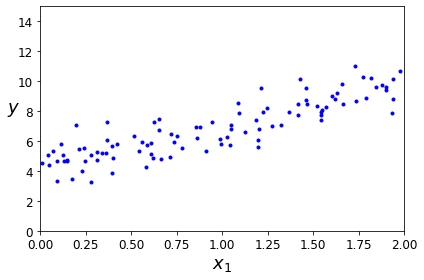

In [3]:
#Plot the values
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
save_fig("generated_data_plot")
plt.show()

Let's use the normal equation to compute <strong>theta_hat</strong>

In [4]:
X_b = np.c_[np.ones((100, 1)), X] #Add x[0]=1 to each instance
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [5]:
theta_best

array([[4.21509616],
       [2.77011339]])

We would hope that the results would be similar to our function 
(y = 4 + 3X[1] + Gaussina noise), where <strong>theta[0]</strong> = 4 and <strong>theta[1]</strong> = 3. Instead we got <strong>theta[0]</strong> = 4.2 and <strong>theta[1]</strong> = 2.7. The results are an outcome of how the noise affects the original function

Next step is to make a prediction using <strong>theta_hat</strong>

In [6]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new] #Adds x[0]=1 to each instance
y_pred = X_new_b.dot(theta_best)
y_pred

array([[4.21509616],
       [9.75532293]])

Saving figure Linear model prediction plot


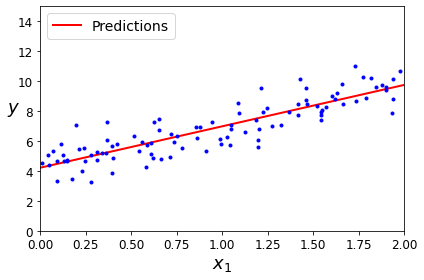

In [7]:
#Plot the predictions
plt.plot(X_new, y_pred, "r-", linewidth=2, label="Predictions")
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0, 2, 0, 15])
save_fig("Linear model prediction plot")
plt.show()

In Scikit Learn it's very simple to do a linear regression

In [8]:
lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([4.21509616]), array([[2.77011339]]))

In [9]:
lin_reg.predict(X_new)

array([[4.21509616],
       [9.75532293]])

Scikit Learn's LinearRegression() class is based on the scipy.linalg.lstsq() function (the name stands for "least squared") which you could call directly

In [10]:
#numpy.linalg.lstsq(a, b, rcond="warn")
#Returns x(array), residuals(array), rank(int), s(array)
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd

array([[4.21509616],
       [2.77011339]])

This function computes <strong>theta_hat</strong> = <img src="images/Moore P + vector of target values.svg" style="display:inline-block; margin:0;">, where <img src="images/Moore-penrose pseudo-inverse.svg" style="display:inline-block; margin:0;"> is the pseudoinverse of <strong>X</strong>. You can call it directly

In [11]:
#numpy.linalg.pinv(a, rcond=1e-15, hermitian=False)
#Returns B(array) - pseudoinverse of a
np.linalg.pinv(X_b).dot(y)

array([[4.21509616],
       [2.77011339]])

This approach uses a standard matrix factorization technique called <em>Singular Value Decompisition</em> (SVD) that decomposes the trainin set matrix <strong>X</strong> into the matrix multiplication of three matrices <img src="images/SVD matrices.png" style="display:inline-block; margin:0;">. This makes it more efficient than computing the normal equation and it handles edge cases as well

##### Computational complexity

In <em>Normal Equation</em> the computational complexity of inverting a matrix is O(n^2.4) to O(n^3). So, if you double the number of features, you multiply the computation time by roughly 2^2.4 = 5.3 to 2^3 = 8

In <em>SVD approach</em> used by Scikit Learn's LinearRegression it's about O(n^2). So, if you double the number of features, you multiply the computational time by roughly 4

<strong>Note:</strong> Both get very slow once the number of features grow very large (100,000). But, because both are linear with regard to the number of instances in the training set (they're O(m)), they can handle large training set efficiently

In the next section, we will look at how to use <em>gradient descent</em> in cases where there are large number of features or too many training instances to fit in memory

# End Of Section: Linear Regression

# Section: Gradient Descent

<em>Gradient Descent</em> is a generic optimization algorithm that tweaks parameters iteratively in order to minimize a cost function.<br> You start by filling the vector parameter <strong>theta</strong> with random values (random initialization). Then, you improve it gradually with each learning (learning rate) step trying to decrease the cost function (MSE) until the algorithm <em>converges</em> to a minimum

For instance, Suppose you're lost in the mountains with minimal visability and you want to get to the bottom of the mountain. A good strategy is to go downhill in the direction of the steepest slope.

In regards to to <em>learning rate</em>: if it's too small, then it will take GD many iterations to converge, which will take a long time. On the other hand, if it's too high, GD might diverge and failing to find the minimum

In more complex functions, there may be holes, rifges, plateaus etc, that make convergence to the minimum difficult. The random inititialization might start the algorithm at a point where <em>local minimum</em> is the only possible outcome without reaching <em>global minimum</em>

In Linear Regression, the MSE cost function is a convex function. Meaning that if you pick any two points on the curve, the line segment joining them never crosses the curve. This implies that there aren't any local minima, but only one <em>gloabal minimum</em>. Moreover, it's also a continuous function with a slope that never change abruptly. This two facts mean that GD is guaranteed to approach arbitrarily close to the <em>global minimum</em>

<strong>Note:</strong> In GD, ensure that all features have a similar scale (StandardScaler()), or else it will take much longer to converge

Training a model that effectively minimizes a cost function, means we found a combination of parameters that helped us reach that. When looking into the  models <em>parameter space,</em> the more dimensions it has, the harder it is to find a suitable parameter. Fortunately, Linear Regression's cost function is convex, this means that finding the best parameter is only a matter of time

##### Batch gradient descent with linear regression

This type of algorithm uses the full training set <strong>X</strong> to make calculations for every step. Thus, it's very slow on large training sets. However, training a Linear Regression using GD scales well with the number of features, as opposed to using Normal Equation or SVD decomposition 

TO implementing GD, you need to compute the gradient of the cost function in regards to each models parameter <strong>theta[j]</strong>. That is, you need to calculate how much the cost function will change if you change <strong>theta[j]</strong> just a little bit. This is called a <em>Partial derivative</em>.

<img src="images/Partial derivatives of the cost function.png">

Instead of computing these partial derivatives individually, you can use the following equation to calculate them all at once

<img src="images/Gradient vector of the cost function.png" style="height: 190px;">

The gradient vector points uphill, so we just need to go the opposite direction. Which means subtracting $\theta$ (gradient vector) with <img src="images/theta.png" style="display: inline-block ; margin: 0">(model parameter, <strong>theta</strong>). We'll use <img src="images/Eta.png" style="display: inline-block ; margin: 0">(eta) by multiplying it with the gradient vector to determine the size of the downhill step

<img src="images/Gradient descent step.png">

Let's implement the algorithm

In [12]:
eta = 0.1 #Learning rate
n_iterations = 1000
m = 100

theta = np.random.randn(2,1) #Random initialization

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta*gradients

In [13]:
theta

array([[4.21509616],
       [2.77011339]])

In [14]:
X_new_b.dot(theta)

array([[4.21509616],
       [9.75532293]])

As we can see the results match up with the ones we got from the <em>Normal Equation</em>, which is good news

Let's check how different learning rates (<img src="images/Eta.png" style="display: inline-block ; margin: 0">(eta)) effect GD. We'll show the first 10 steps (dashed red line represents the starting point)

In [47]:
theta_path_bgd = []

def plot_gradient_descent(theta, eta, theta_path=None):
    m = len(X_b) #Number of instances
    n_iterations = 1000
    plt.plot(X, y, "b.")
    for iteration in range(n_iterations):
        if iteration < 10:
            y_predict = X_new_b.dot(theta)
            style = "b-" if iteration > 0 else "r--"
            plt.plot(X_new, y_predict, style)
        gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
        theta = theta - eta * gradients
        if theta_path is not None:
            theta_path.append(theta)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 2, 0, 15])
    plt.title(r"$\eta = {}$".format(eta), fontsize=16)

Saving figure Gradient descent plot with different learning rates(eta)


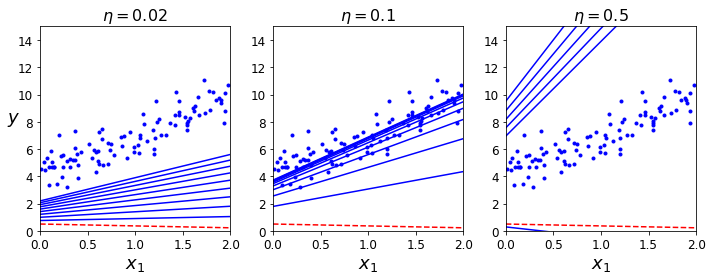

Figure 4-8


In [48]:
np.random.seed(42)
theta = np.random.randn(2, 1) #Random initialization

plt.figure(figsize=(10, 4))
plt.subplot(131); plot_gradient_descent(theta, eta=0.02)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(132); plot_gradient_descent(theta, eta=0.1, theta_path=theta_path_bgd)
plt.subplot(133); plot_gradient_descent(theta, eta=0.5)

save_fig("Gradient descent plot with different learning rates(eta)")
plt.show()
print("Figure 4-8")

On the <strong>left</strong>, the learning rate is too low - the algorithm will reach to solution but it will take a while. The <strong>middle</strong> plot, it seems the right learning rate - the algorithm converged to the solution in a few iterations. Lastly, on the <strong>right</strong> the learning rate is too high - it diverges all over the place and it seems to get farther away each step

Another way to evaluate a good learning rate is using grid search, but limiting it to a number of iterations so as to eliminate models that take too long to converge

In order to find the best learning rate, set a very large number of iterations but interrupt the algorithm when the gradient vector becomes smaller than a tiny number <img src="images/Tolerance.png" style="display:inline-block; margin: 0;"> (called tolerance). This shows that GD is very close to the minimum

##### Stochastic gradient descent

<em>Stochastic gradient descent</em> picks a random instance in the training setand computes its gradient. This makes it faster than <em>BGD</em> because it has very little data to manipulate in a single iteration. This means that it's possible to train it in very large datasets as well, since only one instance is is memory at each iteration

<strong>Note:</strong> <em>SGD</em> can be implemented as an out-of-core algorithm as well

However, due to its stochastic (random) nature, the cost function will go up and down, decreasing only in average. Over time it will end up very close to the minimum but will cotinue to bounce around. Thus, the results are good yet not optimal. 

Because <em>SGD</em>'s cost function is irregular, it has the ability to jump out of local minima, which increases its ability to find the global minimum

To resolve the issue at hand, we can gradually reduce the learning rate. The function that determines the learning rate at each iteration is called <em>learning schedule</em>

Let's implement <em>SGD</em> using a simple <em>learning schedule</em>

In [17]:
theta_path_sgd = []
m = len(X_b)
np.random.seed(42)

Saving figure SGD plot after 20 iterations


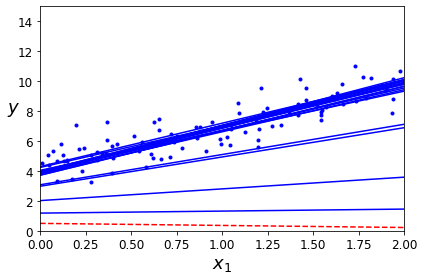

Figure 4-10


In [18]:
#Plot first 20 iterations
n_epochs = 50
t0, t1 = 5, 50 #Learning schedule hyperparameters

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2, 1) #Random initialization

for epoch in range(n_epochs):
    for i in range(m):
        if epoch == 0 and i < 20:
            y_predict = X_new_b.dot(theta)
            style = "b-" if i > 0 else "r--"
            plt.plot(X_new, y_predict, style)
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index + 1]
        yi = y[random_index: random_index + 1]
        gradients = 2 * xi.T.dot(xi.dot(theta)- yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients
        theta_path_sgd.append(theta)
        
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
save_fig("SGD plot after 20 iterations")
plt.show()
print("Figure 4-10")

In [19]:
theta

array([[4.21076011],
       [2.74856079]])

It returns a solution simialr to the <em>normal equation</em>

<strong>Note:</strong> When using SGD, shuffle the instances before or during the training. Thus, training instances become independent and identically distributed (IID). Being IID ensures the parameters get pulled towards the global optimum, on average

In Scikit Learn we can perform a Linear Regression using SGD with ease

In [20]:
#sklearn.model_selection.SGDRegressor(loss="squared_loss", *, penalty="l2",
#alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=1000, tol=0.001,
#shuffle=True, verbose=0, epsilon=0.1, random_state=None, 
#learning_rate="invscaling", eta0=0.01, power_t=0.25, early_stopping=False,
#validation_fraction=0.1, n_iter_no_change=5, warm_start=False, average=False)
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1, 
                      random_state=42)
sgd_reg.fit(X, y.ravel()) #ravel() returns a flattened 1D array

SGDRegressor(eta0=0.1, penalty=None, random_state=42)

In [21]:
sgd_reg.intercept_, sgd_reg.coef_

(array([4.24365286]), array([2.8250878]))

It returns a solution simialr to the <em>normal equation</em>

##### Mini-batch gradient descent

<em>Mini-batch Gradient Descent</em> computes the gradients on small random sets of instances called <em>mini-batches</em>. The main advantage of this algorithm is that you get a boost in performance from hardware optimization of matrix operations, more so with GPU's

<em>MBGD</em> is less erratic than <em>SGD</em>, this allows it to get a bit closer to the minimum. But it may find it more difficult to escape from a local minimum

Let's implement <em>Mini-Batch Gradient Descent</em> with a <em>learning schedule</em>

In [22]:
theta_path_mgd = []

n_iterations = 50
minibatch_size = 20

np.random.seed(42)
theta = np.random.randn(2, 1) #Random initialization

t0, t1 = 200, 1000
def learning_schedule(t):
    return t0 / (t + t1)

t = 0
for epoch in range(n_iterations):
    shuffled_indices = np.random.permutation(m)
    X_b_shuffled = X_b[shuffled_indices]
    y_shuffled = y[shuffled_indices]
    for i in range(0, m, minibatch_size):
        t += 1
        xi = X_b_shuffled[i:i+minibatch_size]
        yi = y_shuffled[i:i+minibatch_size]
        gradients = 2/minibatch_size * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(t)
        theta = theta - eta * gradients
        theta_path_mgd.append(theta)

In [23]:
theta

array([[4.25214635],
       [2.7896408 ]])

It returns a solution simialr to the <em>normal equation</em>

Let's plot the paths of the 3 gradient descent algorithms

In [51]:
theta_path_bgd = np.array(theta_path_bgd)
theta_path_sgd = np.array(theta_path_sgd)
theta_path_mgd = np.array(theta_path_mgd)

Saving figure Plot of the 3 gradient descent algorithms


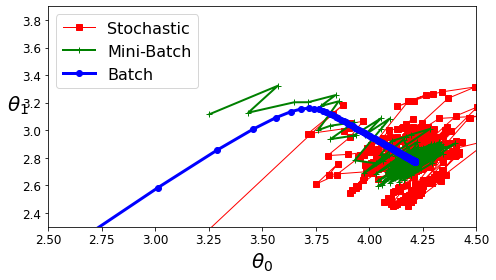

Figure 4-11


In [52]:
plt.figure(figsize=(7,4))
plt.plot(theta_path_sgd[:, 0], theta_path_sgd[:, 1], "r-s", linewidth=1, label="Stochastic")
plt.plot(theta_path_mgd[:, 0], theta_path_mgd[:, 1], "g-+", linewidth=2, label="Mini-Batch")
plt.plot(theta_path_bgd[:, 0], theta_path_bgd[:, 1], "b-o", linewidth=3, label="Batch")
plt.legend(loc="upper left", fontsize=16)
plt.xlabel(r"$\theta_0$", fontsize=20)
plt.ylabel(r"$\theta_1$", rotation=0, fontsize=20)
plt.axis([2.5, 4.5, 2.3, 3.9])
save_fig("Plot of the 3 gradient descent algorithms")
plt.show()
print("Figure 4-11")

We can see from the plot that <em>SGD</em> and <em>MGD</em> end up near the minimum but <em>BGD</em> actually stop there. Nonetheless, it's important to remember that it taks a long time to train <em>BGD</em>, and <em>SGD</em> <em>MGD</em> would reach the minimum provided with a good learning schedule

This table helps clarify the differences in <em>GD</em> algorithms for Linear Regression
<ul>
    <li><strong>m</strong>: Number of training instances (e.g number of pixels)</li>
    <li><strong>n</strong>: Number of features (e.g range of color pixel)</li>
</ul>
<img src="images/Comparison of algorithms for linear regression.png">

# End Of Section: Gradient Descent

# Section: Polynomial Regression

If your data is more complex than a straight line, it's still possible to use a linear model to fit nonlinear data. You add powers to each feature, then train a linear model on these new set of features. This technique is called <em>Polynominal Regression</em>

Let's generate some nonlinear data, based on a quadratic equation (y = ax^2 + bx + c)

In [66]:
np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1) #y = 0X^2 + X + 2 + Gaussian noise

Saving figure Polynomial random data plot


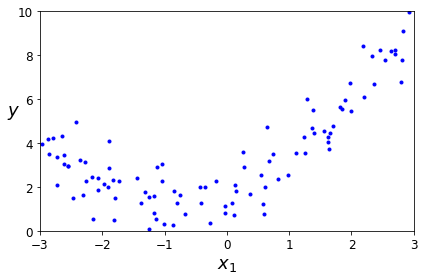

Figure 4-12


In [67]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
save_fig("Polynomial random data plot")
plt.show()
print("Figure 4-12")

As we can see, a straight line won't fit our data. We'll use Scikit Learn's PolynomialFeatures class to transform the training data - adding the square (second degree polynomial) of each feature to the training set as new features (in this case there's only one feature)

In [68]:
#sklearn.preprocessing.PolynomialFeatures(degree=2, *, interaction_only=False, 
#include_bias=True, order="C")
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
X[0]

array([-0.75275929])

In [69]:
X_poly[0]

array([-0.75275929,  0.56664654])

With the extended training data from the polynomial transformation, we can fit a LinearRegression model

In [63]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([1.9326696]), array([[0.99165946, 0.48476612]]))

Saving figure Polynomial regression predictions


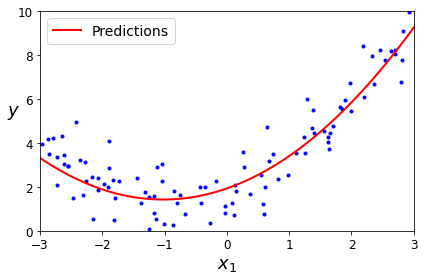

Figure 4-13


In [70]:
#Plot the line across the nonlinear data
X_new = np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)

plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10])
save_fig("Polynomial regression predictions")
plt.show()
print("Figure 4-13")

<em>Note:</em> when there are multiple features, PolynomialFeatures adds all combinations of features up to the given degree. E.g, two features <em>a</em> and <em>b</em> with <em>degree = 3</em> would add features <em>a^2, a^3, b^3</em> and combinations of <em>ab, a^2b, ab^2</em>.
<br>
Pay attention of the combination explosion of the number of features 

# End Of Section: Polynomial Regression

# Section: Learning Curves

When performing a high degree polynomial regression, fitting the data is better than a linear regression

Let's plot a 300 degree polynomial model to the training data, and compare the results to a plain linear model and a quadratic model (second degree polynomial)

Saving figure Plots of 300 degree, 2 degree and plain linear regression


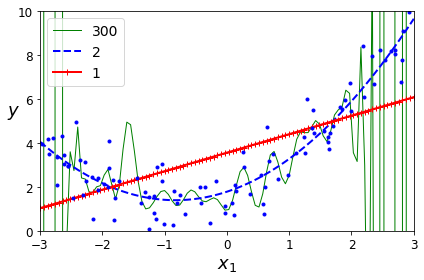

Figure 4-14


In [83]:
for style, width, degree in (("g-", 1, 300), ("b--", 2, 2), ("r-+", 2, 1)):
    polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    polynomial_regression = Pipeline([
        ("poly_features", polybig_features),
        ("std_scaler", std_scaler),
        ("lin_reg", lin_reg),
    ])
    polynomial_regression.fit(X, y)
    y_newbig = polynomial_regression.predict(X_new)
    plt.plot(X_new, y_newbig, style, label=str(degree), linewidth=width)

plt.plot(X, y, "b.", linewidth=3)
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10])
save_fig("Plots of 300 degree, 2 degree and plain linear regression")
plt.show()
print("Figure 4-14")

The plot illustrates how the high-degree <em>Polynomial Regression</em> (green line) is overfitting the training date, while the linear model (red line) is underfitting it. In this case the qudratic model (dashed blue line) generalizes the best - it's most likely because the data was generated with a quadratic function

In general, one can't know what function generated the data. So, how can you decide how complex your model should be? I.e, a high degree polynomial model? or perhaps a quadratic one? a simple linear model? <br>
You can use <strong>cross-validation</strong> to get an estimate of a models generalization performance:
<ul>
    <li><strong>Good performance on the training data, but generalizes poorly (according to cross validation metrics)</strong>, then the model is overfitting</li>
    <li><strong>Performs poorly on both</strong>, then it's underfitting</li>
</ul>

<em>Learning curves</em> is another way to tell. Essentially, the are plots of the models perfomrance on the training and validation set as a function of the number of instances in the training set (or the training iteration)

Let's make the plots by; training a model several times on different sized subsets of the training set

In [96]:
def plot_learning_curve(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2,
                                                     random_state=10)
    train_errors, val_errors = [], []
    for m in range(1,len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))
    
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="Train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
    plt.legend(loc="upper right", fontsize=14)
    plt.xlabel("Training set size", fontsize=14)
    plt.ylabel("RSME", rotation=0, fontsize=14)

Let's look at the <em>learning curve</em> of a linear regression model

Saving figure Learning curve - Linear regression underfitting


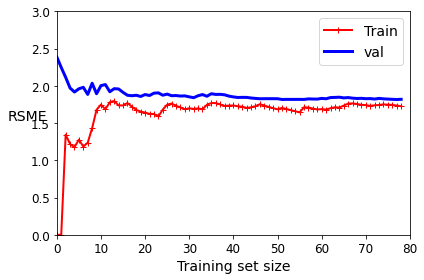

Figure 4-15


In [99]:
lin_reg = LinearRegression()
plot_learning_curve(lin_reg, X, y)
plt.axis([0, 80, 0, 3])
save_fig("Learning curve - Linear regression underfitting")
plt.show()
print("Figure 4-15")

Let's look at the <strong>performance of the training data</strong>: when it's shown only a few instances, the model can fit them perfectly (that's why the curve starts at zero). As more instances are added, the model fails to fit the data because the data is too noisy and it's not linear. That's why it goes up and plateaus, where adding new instances doesn't make the average error better or worse

Now let's look at the <strong>performance of the validation data</strong>: The error is high at the beginning because it can't generalize too well on few trainining instances. As it's shown more data, the error reduces. Just like in the training data, the data isn't linear, thus it plateau's

These <em>learning curves</em> are typical of a model that's <strong>underfitting</strong> - reaching a plateau where they're close and fairly high. Adding more training data wont help the performance. Rather, using a more complex model or come up with better features will help

Let's look at the <em>learning curve</em> of a 10th-degree polynomial model

Saving figure Learning curve - 10th degree polynomial regression model overfitting


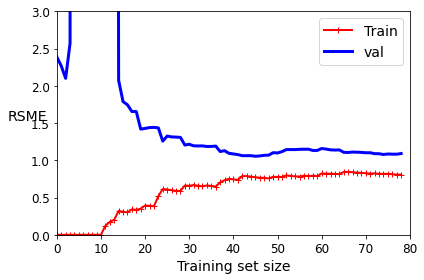

Figure 4-16


In [103]:
polynomial_regression = Pipeline([
    ("poly_features" ,PolynomialFeatures(degree=10,include_bias=False)),
    ("lin_reg", LinearRegression()),
])
plot_learning_curve(polynomial_regression, X, y)
plt.axis([0, 80, 0, 3])
save_fig("Learning curve - 10th degree polynomial regression model overfitting")
plt.show()
print("Figure 4-16")

There are two important differences between this plot and the previous one:
<ul>
    <li>Error on the training data is lower that the Linear Regression</li>
    <li>The gap is bigger, which means that the model performs significantly better on the training data than on the validation - the hallmark of an <strong>overfitting</strong> model. </li>
</ul>

One way to improve an overfitting model is to add more training data until the validation error is close to the training error

##### The bias/variance trade-off

A model's generalization error can be expressed as the sum of 3 different errors:
<ul>
    <li><strong>Bias:</strong> Occurs when wrong assumptions are made about the data. I.e, assuming the data is linear when it's actually quadratic. A high bias model is likely to <strong>underfit</strong> the training data</li>
    <li><strong>Variance:</strong> The model is very sensitive to small variations in the training data. I.e, a model with many degrees of freedom (like a high degree polynomial model)is likely to have high variance and result in <strong>overfitting</strong> the training data</li>
    <li><strong>Irreducible error:</strong> This part is due to the nosiness of the data. The only way to reduce this error is to clean up the data (e.g fix the data source; such as broken sensors, or detect and remove outliers)</li>
</ul>

# End Of Section: Learning Curves

# Section: Regularized Linear Models

Regularizing the model is a good way to reduce overfitting. We can do this by having fewer degrees of freedom. In a <strong>polynomial model</strong>, we can achieve this by reducing the number of polynomial degrees

For <strong>linear</strong> model, regularization is typically achieved by constraining the weights of the model. We will now look at <strong>Ridge Regression</strong>, <strong>Lasso Regression</strong> and <strong>Elastic Net</strong>, which implement three different ways to constrain the weights

##### Ridge regression

<em>Ridge Regression</em> is a regularized version of <em>Linear Regression</em>: a regularization term equal to <img src="images/Ridge regression - regularization term.png" style="display:inline-block; margin:0;"> is added to the cost function. <br> This forces the learning algorithm to fit the data and keep the weights as small as possible

<strong>Note:</strong> The regularization term should only be added during training. After it has trained, you want to use the unregularized performance measure to evaluate the model's performance

The hyperparameter $\alpha$ controls how much you want to regularize the model. If $\alpha$ = 0, then Ridge Regression is just a Linear Regression. If $\alpha$ is very large, then all weights end up very close to zero, resulting in a flat line going through the data's mean

<img src="images/Ridge regression cost function.png">

<strong>Note:</strong> the bias term $\theta_0$ is not regularized (the sum starts at i=1, not 0). If we define <strong>w</strong> as the vector of feature weigths ($\theta_0$ to $\theta_n$), then the regularization term is equal to 1/2(||<strong>w</strong>||2)^2, where ||<strong>w</strong>||2 represents the l2 norm of the weight vector. For GD, add $\alpha$<strong>w</strong> to the MSE gradient vector

Let's plot a linear and polynomial models with various levels of Ridge regularization

In [105]:
np.random.seed(42)
m = 20
X = 3 * np.random.rand(m, 1)
y = 1 + 0.5 * X + np.random.randn(m, 1) / 1.5
X_new = np.linspace(0, 3, 100).reshape(100, 1)

In [106]:
#sklearn.linear_model.Ridge(alpha=1.0, *, fit_intercept=True, normalize=False,
#copy_X=True, max_iter=None, tol=0.001, solver="auto", random_state=None)
ridge_reg = Ridge(alpha=1, solver="cholesky", random_state=42)
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[1.55071465]])

In [107]:
ridge_reg = Ridge(alpha=1, solver="sag", random_state=42)
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[1.5507201]])

Saving figure Plot of linear and polynomial with ridge regression


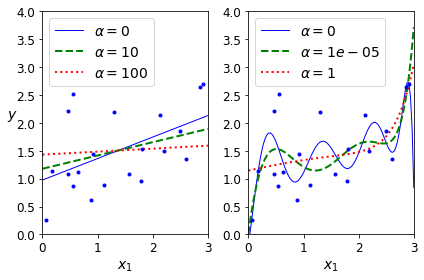

Figure 4-17


In [118]:
def plot_model(model_class, polynomial, alphas, **model_kargs):
    for alpha, style in zip(alphas, ("b-", "g--", "r:")):
        model = model_class(alpha, **model_kargs) if alpha > 0 else LinearRegression()
        if polynomial:
            model = Pipeline([
                ("poly_fetures", PolynomialFeatures(degree=10 , include_bias=False)),
                ("std_scaler", StandardScaler()),
                ("regul_reg", model)
            ])
        model.fit(X, y)
        y_new_regul = model.predict(X_new)
        lw = 2 if alpha > 0 else 1
        plt.plot(X_new, y_new_regul, style ,linewidth=lw, label=r"$\alpha = {}$".format(alpha))
    
    plt.plot(X, y, "b.", linewidth=3)
    plt.legend(loc="upper left", fontsize=14)
    plt.xlabel("$x_1$", fontsize=14)
    plt.axis([0, 3, 0, 4])

plt.plot(figsize=(8, 4))
plt.subplot(121)
plot_model(Ridge, polynomial=False, alphas=(0, 10, 100), random_state=42)
plt.ylabel("$y$", rotation=0, fontsize=14)
plt.subplot(122)
plot_model(Ridge, polynomial=True, alphas=(0, 10**-5, 1), random_state=42)

save_fig("Plot of linear and polynomial with ridge regression")
plt.show()
print("Figure 4-17")

The <strong>left plot</strong> is a plain Ridge model, which leads to a linear predictions.<br>
On the <strong>right plot</strong>, the data is extended using PolynomialFeatures(degree=10), then scaled with StandardScaler() and finally Ridge model are applied to the resulting features: a Polynomial Regression with Ridge Regularization

<strong>Note</strong> how increasing the $\alpha$ leads to flatter (i.e, less extreme, more reasonabe) predictions, thus reducing the variance but increasing the bias